In [1]:
import sys; sys.path.append('../..'); from wwa import *

# quick method for area-weighted averaging (will add to WWA main but need to generalise dims first)
def awmean(da): return da.weighted(np.cos(np.deg2rad(da.lat))).mean(["lat", "lon"])

## Compute from monthly

In [41]:
! wget https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv
gmst_monthly = pd.read_csv("GLB.Ts+dSST.txt", comment = "#", sep = " +", engine = "python", index_col = 0, na_values = ["****", "***"]) / 100

--2024-12-17 12:27:26--  https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 2001:4d0:2310:230::233, 129.164.128.233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|2001:4d0:2310:230::233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12697 (12K) [text/csv]
Saving to: ‘GLB.Ts+dSST.csv.3’

GLB.Ts+dSST.csv.3   100%[===================>]  12.40K  --.-KB/s    in 0s      

2024-12-17 12:27:27 (35.1 MB/s) - ‘GLB.Ts+dSST.csv.3’ saved [12697/12697]



In [51]:
df_monthly = pd.concat([pd.DataFrame({"gmst" : gmst_monthly.iloc[:,i].values}, index = [datetime(y,i+1,1) for y in gmst_monthly.index]) for i in range(12)]).sort_index().dropna(axis = 0, how = "all")

In [42]:
gmst_yearly = pd.DataFrame({"gmst" : gmst_monthly.iloc[:,:12].mean(axis = 1)})
gmst_yearly.loc[2025, "gmst"] = np.nan
gmst_yearly_4y = gmst_yearly.rolling(4, center = True, min_periods = 2).mean()

In [43]:
# attempting to replicate the climate explorer
gmst_yearly_excl2024 = gmst_yearly.loc[slice(None, "2023")].copy()
gmst_yearly_excl2024.loc[2024, "gmst"] = np.nan
gmst_yearly_excl2024.loc[2025, "gmst"] = np.nan
gmst_yearly_excl2024 = gmst_yearly_excl2024.rolling(4, center = True, min_periods = 1).mean()

## 4-year smoothing

In [6]:
gmst_annual = pd.read_csv("gmst_annual.txt", comment = "#", sep = " +", engine = "python", header = None, names = ["year", "gmst"], index_col = "year")

In [7]:
gmst_cx4y = pd.read_csv("gmst_4ysmoothed.txt", comment = "#", sep = " +", engine = "python", header = None, names = ["year", "gmst"], index_col = "year")

In [8]:
gmst_sm = gmst_annual.rolling(4, center = True, min_periods = 3).mean()

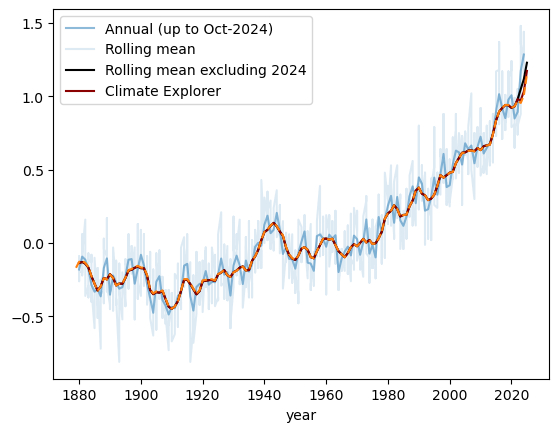

In [61]:
gmst_yearly.plot(alpha = 0.5)
ax = plt.gca()
ax.plot(df_monthly.index.year, df_monthly.gmst, alpha = 0.15, color = "tab:blue")
# gmst_annual.plot(alpha = 0.4, color = "tab:green", ax = plt.gca())

gmst_yearly_4y.plot(ax = plt.gca(), color = "k")
gmst_yearly_excl2024.plot(ax = plt.gca(), color = "darkred")
gmst_cx4y.plot(ax = plt.gca(), ls = "--", color = "tab:orange")

plt.legend(["Annual (up to Oct-2024)", "Rolling mean", "Rolling mean excluding 2024", "Climate Explorer"])

In [62]:
zz = merge_byindex([gmst_yearly.rename(columns = {"gmst" : "annual"}), gmst_yearly_4y, gmst_yearly_excl2024, gmst_cx4y]).rename(columns= {"gmst_x" : "incl 2024", "gmst_y" : "excl 2024", "gmst" : "ClimExp"}).loc[2020:]
zz

,annual,incl 2024,excl 2024,ClimExp
2020,1.007500,0.921458,0.921458,0.922292
2021,0.849167,0.932083,0.932083,0.932917
2022,0.894167,0.981042,0.981042,0.969653
2023,1.173333,1.050417,0.972222,0.955000
2024,1.285000,1.117500,1.033750,1.007083
2025,NaN,1.229167,1.173333,1.150221


<AxesSubplot: >

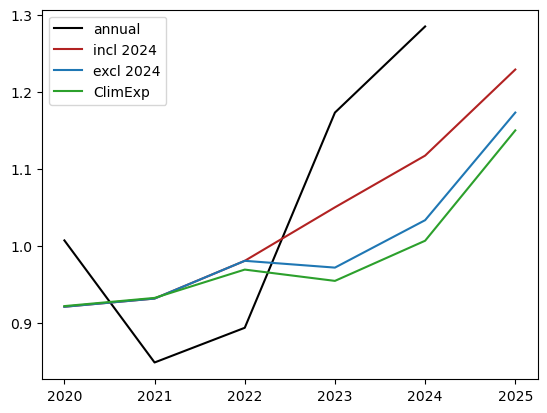

In [63]:
zz.plot(color = ["k", "firebrick", "tab:blue", "tab:green"])